# Diseño Automático de Metaheurísticas
> CUSTOMHyS: Customising Optimisation Metaheuristics via
Hyper-heuristic Search
Por: Jorge Mario Cruz Duarte [(jorge.cruz@tec.mx)](mailto:jorge.cruz@tec.mx)

Este tutorial está basado en el artículo de [SoftwareX](https://www.sciencedirect.com/science/article/pii/S2352711020303411)

## 0. Instalación del paquete o descarga desde GitHub
En caso de que no lo tengas instalado

In [1]:
# !pip install customhys==1.1.0.
# !pip install latex

In [2]:
# !git clone https://github.com/jcrvz/customhys.git .

## 1. Módulo de funciones de prueba
En esta sección veremos cómo usar las funciones de prueba que vienen con el framework.

Primero cargaremos el módulo correspondiente además de otras utilidades para graficar.

In [3]:
from customhys import benchmark_func as bf

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

import numpy as np
import pandas as pd

Veamos la lista de funciones de prueba:

In [4]:
functions = pd.DataFrame(bf.list_functions(True)).transpose()
functions

,Continuous,Differentiable,Separable,Scalable,Unimodal,Convex,Code
Ackley1,True,True,False,True,False,False,100
Ackley4,True,True,False,True,False,False,100
Alpine1,True,False,True,False,False,False,010
Alpine2,True,True,True,True,False,False,110
Bohachevsky,True,True,True,True,False,False,110
...,...,...,...,...,...,...,...
XinSheYang3,True,True,False,True,True,False,101
XinSheYang4,True,False,False,True,False,False,000
YaoLiu09,True,True,True,True,False,False,110
Zakharov,True,True,False,True,True,True,101


In [5]:
print("Total de funciones de prueba: ", len(functions))

Total de funciones de prueba:  107


Probemos la de Rastrigin y la graficamos

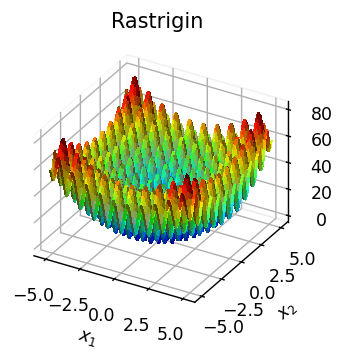

In [6]:
fun = bf.Rastrigin(2)
fun.plot(samples=100, resolution=125)
plt.show()

Ahora grafiquémosla de otra manera, a través de evaluaciones.

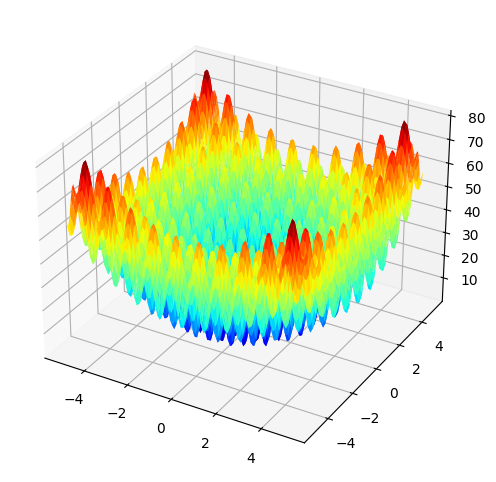

In [7]:
samples = 100

space_constraints = np.array(fun.get_search_range()).T

X, Y = np.meshgrid(np.linspace(*space_constraints[0], samples),
                   np.linspace(*space_constraints[1], samples))
Z = np.array([fun.get_function_value([x, y])
          for x, y in zip(X.ravel(), Y.ravel())]).reshape(X.shape)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0.5,
                antialiased=True, cmap=plt.cm.jet)
plt.show()

Grafiquemos otra y modifiquemos un poco su comportamiento

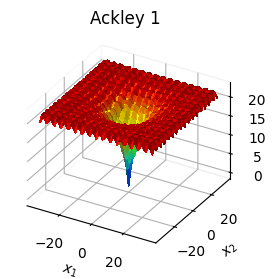

In [8]:
fun = bf.Ackley1(2)
fun.plot()
plt.show()

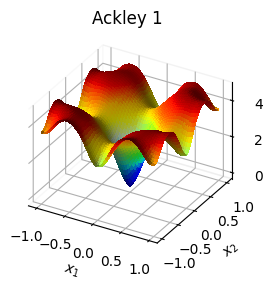

In [9]:
fun.set_search_range([-1.0, -1.0], [1.0, 1.0])
fun.plot()
plt.show()

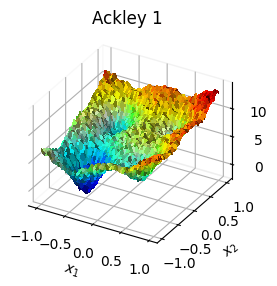

In [10]:
fun.set_offset_function(-2)
fun.set_scale_function(2)
fun.set_noise_level(1.0)
fun.set_offset_domain([0.5, 0.5])
fun.plot()
plt.show()

## 2. Módulo de población
En esta sección revisaremos el uso del módulo de población, que es en sí la base de los algoritmos que vamos a diseñar.

Comencemos cargando el módulo y volviendo a cargar la función inicial

In [11]:
from customhys import  population as pp
fun = bf.Rastrigin(2)

Ahora, generaremos una población en el espacio de búsqueda del problema anterior. Esta generación puede ser aleatoria o siguiendo un patrón de vértices:

In [12]:
pop = pp.Population(fun.get_search_range(), num_agents=50)
pop.initialise_positions('vertex')
# pop.initialise_positions('random')

Nota la diferencia entre las posiciones internas del módulo y las posiciones externas al módulo:

In [13]:
print(pop.positions)
print(pop.get_positions())

[[-1.         -1.        ]
 [-1.          1.        ]
 [ 1.         -1.        ]
 [ 1.          1.        ]
 [-0.92307692 -0.92307692]
 [-0.92307692  0.92307692]
 [ 0.92307692 -0.92307692]
 [ 0.92307692  0.92307692]
 [-0.84615385 -0.84615385]
 [-0.84615385  0.84615385]
 [ 0.84615385 -0.84615385]
 [ 0.84615385  0.84615385]
 [-0.76923077 -0.76923077]
 [-0.76923077  0.76923077]
 [ 0.76923077 -0.76923077]
 [ 0.76923077  0.76923077]
 [-0.69230769 -0.69230769]
 [-0.69230769  0.69230769]
 [ 0.69230769 -0.69230769]
 [ 0.69230769  0.69230769]
 [-0.61538462 -0.61538462]
 [-0.61538462  0.61538462]
 [ 0.61538462 -0.61538462]
 [ 0.61538462  0.61538462]
 [-0.53846154 -0.53846154]
 [-0.53846154  0.53846154]
 [ 0.53846154 -0.53846154]
 [ 0.53846154  0.53846154]
 [-0.46153846 -0.46153846]
 [-0.46153846  0.46153846]
 [ 0.46153846 -0.46153846]
 [ 0.46153846  0.46153846]
 [-0.38461538 -0.38461538]
 [-0.38461538  0.38461538]
 [ 0.38461538 -0.38461538]
 [ 0.38461538  0.38461538]
 [-0.30769231 -0.30769231]
 

Como necesitamos evaluar la calidad de cada posición para un problema dado, debemos tener presentes la función a evaluar.

In [14]:
pop.evaluate_fitness(lambda x: fun.get_function_value(x))
print(pop.fitness)

[57.84942745 57.84942745 57.84942745 57.84942745 67.65845725 67.65845725
 67.65845725 67.65845725 67.42595459 67.42595459 67.42595459 67.42595459
 32.4994656  32.4994656  32.4994656  32.4994656  64.34789832 64.34789832
 64.34789832 64.34789832 28.17732858 28.17732858 28.17732858 28.17732858
 34.33154453 34.33154453 34.33154453 34.33154453 44.21226873 44.21226873
 44.21226873 44.21226873  8.12833712  8.12833712  8.12833712  8.12833712
 42.76180949 42.76180949 42.76180949 42.76180949 14.45180467 14.45180467
 14.45180467 14.45180467 16.54851609 16.54851609 16.54851609 16.54851609
 36.02404588 36.02404588]


Veamos estas posiciones iniciales en el espacio de búsqueda

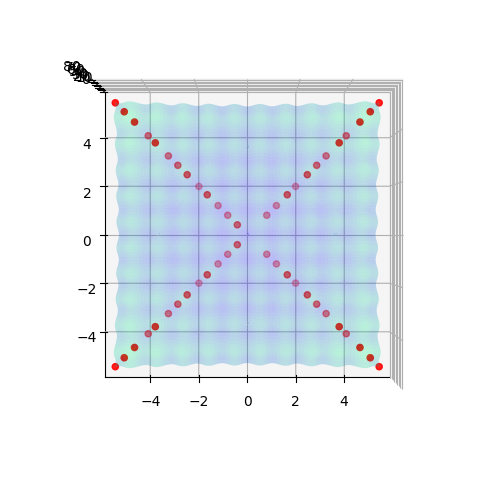

In [15]:
def show_positions(azim=-90, elev=90):
    positions = np.array(pop.get_positions())
    fitness = pop.fitness

    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(projection='3d', )
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0.5,
                    antialiased=True, cmap=plt.cm.winter, alpha=0.25)
    ax.scatter(positions[:,0], positions[:,1], pop.fitness,
               marker='o', color='r')
    ax.view_init(elev, azim)
    plt.show()

show_positions()

Una parte bastante importante consiste en actualizar las posiciones particulares que algunos operadores utilizan

In [16]:
pop.update_positions(level='population', selector='all')
pop.update_positions(level='particular', selector='all')
pop.update_positions(level='global', selector='greedy')

Ahora veamos cuál es la mejor posición entre todas

In [17]:
print(pop.get_state())

x_best = [-1.96923077 -1.96923077], f_best = 8.128337122182147


## 3. Módulo de operadores
En esta sección veremos uno de los módulos más importantes, éste es el de los operadores que nos ayudarán a construir el algoritmo deseado.

In [18]:
from customhys import operators as op

Veamos los operadores disponibles:

In [19]:
print('Perturbadores: ', op.__all__)

Perturbadores:  ['local_random_walk', 'random_search', 'random_sample', 'random_flight', 'differential_mutation', 'firefly_dynamic', 'swarm_dynamic', 'gravitational_search', 'central_force_dynamic', 'spiral_dynamic', 'genetic_mutation', 'genetic_crossover']


In [20]:
print('Selectores: ', op.__selectors__)

Selectores:  ['all', 'greedy', 'metropolis', 'probabilistic']


Ahora veamos la colección por defecto de operadores

In [21]:
import importlib.resources as pkg_resources
import pkgutil
data = pkgutil.get_data("customhys", "collections/default.txt")

for i, x in enumerate(data.decode().split("\n")[:-1]):
    print(i, x, sep=" :: ")

0 :: ('random_search', {'scale': 1.0, 'distribution': 'uniform'}, 'greedy')
1 :: ('central_force_dynamic', {'gravity': 0.001, 'alpha': 0.01, 'beta': 1.5, 'dt': 1.0}, 'all')
2 :: ('central_force_dynamic', {'gravity': 0.001, 'alpha': 0.01, 'beta': 1.5, 'dt': 1.0}, 'greedy')
3 :: ('central_force_dynamic', {'gravity': 0.001, 'alpha': 0.01, 'beta': 1.5, 'dt': 1.0}, 'metropolis')
4 :: ('central_force_dynamic', {'gravity': 0.001, 'alpha': 0.01, 'beta': 1.5, 'dt': 1.0}, 'probabilistic')
5 :: ('differential_mutation', {'expression': 'rand', 'num_rands': 1, 'factor': 1.0}, 'all')
6 :: ('differential_mutation', {'expression': 'rand', 'num_rands': 1, 'factor': 1.0}, 'greedy')
7 :: ('differential_mutation', {'expression': 'rand', 'num_rands': 1, 'factor': 1.0}, 'metropolis')
8 :: ('differential_mutation', {'expression': 'rand', 'num_rands': 1, 'factor': 1.0}, 'probabilistic')
9 :: ('differential_mutation', {'expression': 'best', 'num_rands': 1, 'factor': 1.0}, 'all')
10 :: ('differential_mutation',

In [22]:
dop = [eval(x) for x in data.decode().split("\n")[:-1]]
pd.DataFrame(dop, columns=['Perturbator', 'Parameters', 'Selector'])

,Perturbator,Parameters,Selector
0,random_search,"{'scale': 1.0, 'distribution': 'uniform'}",greedy
1,central_force_dynamic,"{'gravity': 0.001, 'alpha': 0.01, 'beta': 1.5,...",all
2,central_force_dynamic,"{'gravity': 0.001, 'alpha': 0.01, 'beta': 1.5,...",greedy
3,central_force_dynamic,"{'gravity': 0.001, 'alpha': 0.01, 'beta': 1.5,...",metropolis
4,central_force_dynamic,"{'gravity': 0.001, 'alpha': 0.01, 'beta': 1.5,...",probabilistic
...,...,...,...
200,swarm_dynamic,"{'factor': 1.0, 'self_conf': 2.54, 'swarm_conf...",probabilistic
201,swarm_dynamic,"{'factor': 1.0, 'self_conf': 2.54, 'swarm_conf...",all
202,swarm_dynamic,"{'factor': 1.0, 'self_conf': 2.54, 'swarm_conf...",greedy
203,swarm_dynamic,"{'factor': 1.0, 'self_conf': 2.54, 'swarm_conf...",metropolis


También puedes generar una colección de manera automática y luego depurarla en nuestro editor de texto favorito.

In [23]:
op_task = op.obtain_operators(num_vals=5)
print(op_task.__len__(), op_task)

15 [('random_search', {'scale': [1.0], 'distribution': ['uniform']}, ['greedy']), ('central_force_dynamic', {'gravity': [0.0, 0.0025, 0.005, 0.0075, 0.01], 'alpha': [0.0, 0.0025, 0.005, 0.0075, 0.01], 'beta': [1.0, 1.25, 1.5, 1.75, 2.0], 'dt': [0.0, 0.5, 1.0, 1.5, 2.0]}, ['all', 'greedy', 'metropolis', 'probabilistic']), ('differential_crossover', {'crossover_rate': [0.0, 0.25, 0.5, 0.75, 1.0], 'version': ['binomial', 'exponential']}, ['all', 'greedy', 'metropolis', 'probabilistic']), ('differential_mutation', {'expression': ['rand', 'best', 'current', 'current-to-best', 'rand-to-best', 'rand-to-best-and-current'], 'num_rands': [1, 2, 3], 'factor': [0.0, 0.625, 1.25, 1.875, 2.5]}, ['all', 'greedy', 'metropolis', 'probabilistic']), ('firefly_dynamic', {'distribution': ['uniform', 'gaussian', 'levy'], 'alpha': [0.0, 0.125, 0.25, 0.375, 0.5], 'beta': [0.01, 0.2575, 0.505, 0.7525, 1.0], 'gamma': [1.0, 250.75, 500.5, 750.25, 1000.0]}, ['all', 'greedy', 'metropolis', 'probabilistic']), ('gen

In [24]:
op.build_operators(heuristics=op_task, file_name='op_tutorial')

random_search: parameters=2, combinations:1
central_force_dynamic: parameters=4, combinations:625
differential_crossover: parameters=2, combinations:10
differential_mutation: parameters=3, combinations:90
firefly_dynamic: parameters=4, combinations:375
genetic_crossover: parameters=3, combinations:225
genetic_mutation: parameters=4, combinations:375
gravitational_search: parameters=2, combinations:25
random_flight: parameters=3, combinations:25
random_flight: parameters=2, combinations:10
local_random_walk: parameters=3, combinations:75
random_sample: parameters=0, combinations:4
random_search: parameters=2, combinations:15
spiral_dynamic: parameters=3, combinations:125
swarm_dynamic: parameters=5, combinations:750
----------------------------------------------------
TOTAL: families=15, operators=10917


In [25]:
with open("collections/op_tutorial.txt") as file:
    auto_operators = file.read()

print(f"Collection size: {auto_operators.__len__()}")
np.random.choice(auto_operators.split('\n'), 5)

Collection size: 1268903


array(["('genetic_crossover', {'pairing': 'tournament_3_100', 'crossover': 'uniform', 'mating_pool_factor': 0.5}, 'probabilistic')",
       "('genetic_mutation', {'scale': 0.505, 'elite_rate': 0.225, 'mutation_rate': 0.5, 'distribution': 'levy'}, 'greedy')",
       "('genetic_mutation', {'scale': 0.505, 'elite_rate': 0.9, 'mutation_rate': 0.7000000000000001, 'distribution': 'levy'}, 'all')",
       "('firefly_dynamic', {'distribution': 'uniform', 'alpha': 0.5, 'beta': 1.0, 'gamma': 1.0}, 'probabilistic')",
       "('firefly_dynamic', {'distribution': 'gaussian', 'alpha': 0.0, 'beta': 0.505, 'gamma': 250.75}, 'all')"],
      dtype='<U176')

Que podemos usar como:

In [26]:
print(dop[1])

op_to_test = op.process_operators([dop[1]])
print(op_to_test)

op_to_exect = "op.{}(pop,{}".format(*op_to_test[0][0].split('('))
print(op_to_exect)

('central_force_dynamic', {'gravity': 0.001, 'alpha': 0.01, 'beta': 1.5, 'dt': 1.0}, 'all')
(['central_force_dynamic(gravity=0.001,alpha=0.01,beta=1.5,dt=1.0)'], ['all'])
op.central_force_dynamic(pop,gravity=0.001,alpha=0.01,beta=1.5,dt=1.0)


Iteration: 1 :: x_best = [ 0.94695847 -0.95579228], f_best = 2.7437855781199225


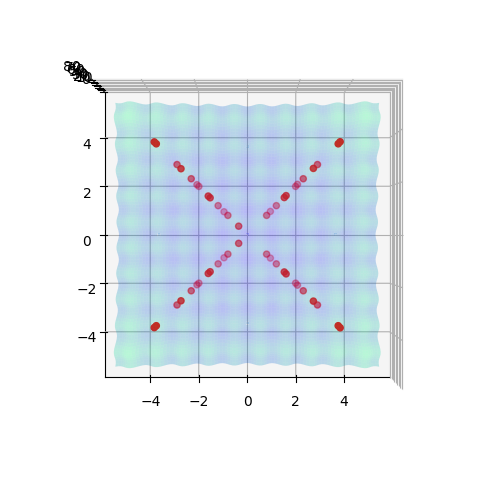

Iteration: 2 :: x_best = [ 1.01356658 -1.01720345], f_best = 2.156691511395863


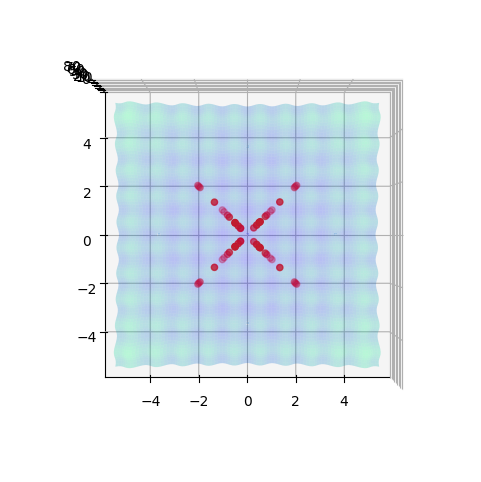

Iteration: 3 :: x_best = [ 1.01356658 -1.01720345], f_best = 2.156691511395863


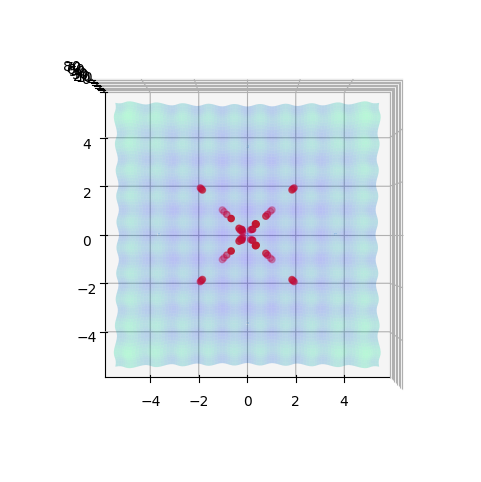

Iteration: 4 :: x_best = [-0.06179181 -0.06179454], f_best = 1.4962377801430122


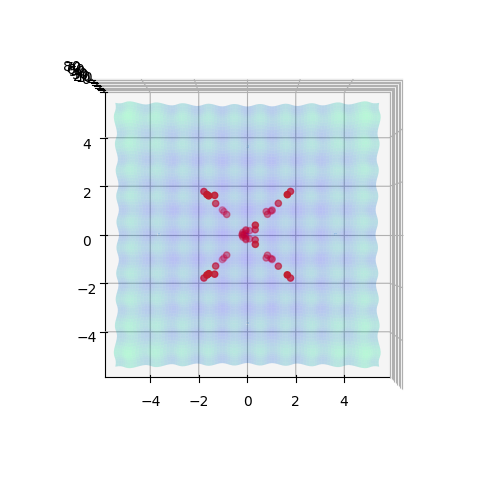

Iteration: 5 :: x_best = [-0.05087475  0.01726504], f_best = 0.5682302423564636


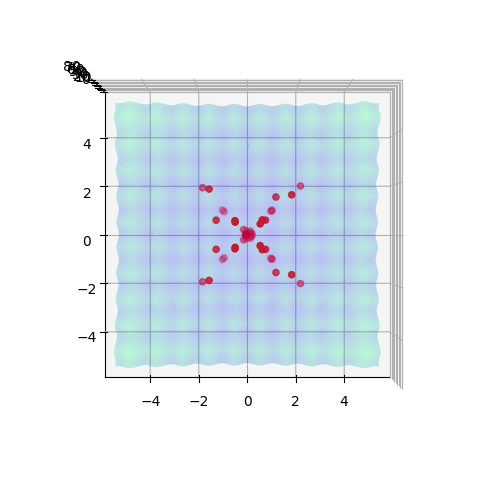

Iteration: 6 :: x_best = [-0.03591346 -0.00189539], f_best = 0.25551575247757086


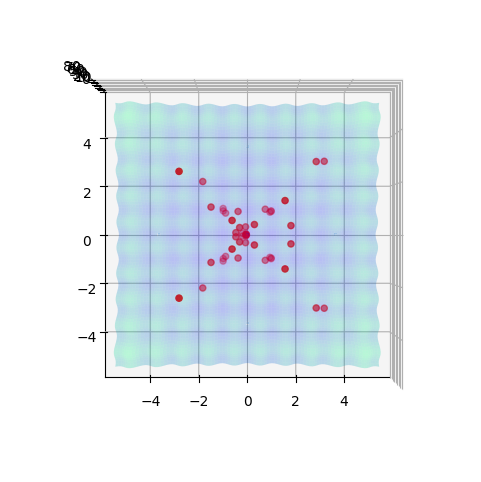

Iteration: 7 :: x_best = [-0.03071933 -0.0029651 ], f_best = 0.18838466557403422


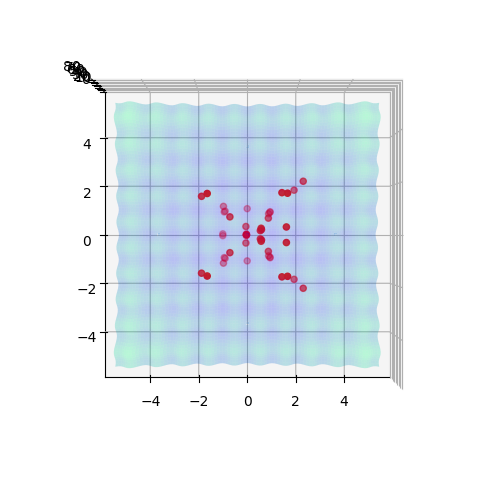

Iteration: 8 :: x_best = [-0.02537849 -0.00222128], f_best = 0.1284876335542009


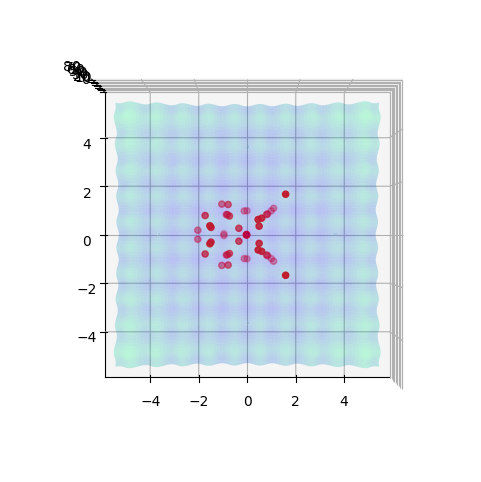

Iteration: 9 :: x_best = [-0.01850575 -0.00504742], f_best = 0.07291966469240307


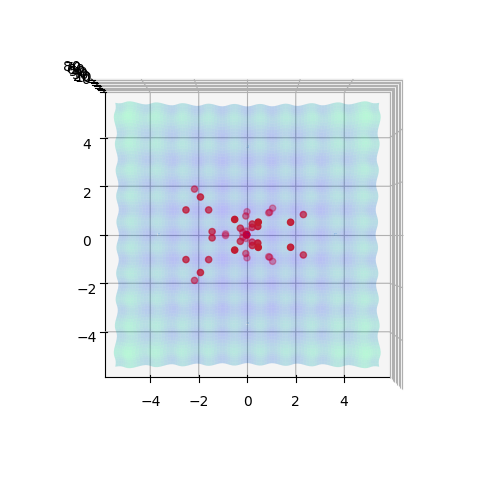

Iteration: 10 :: x_best = [-0.01845293 -0.00118537], f_best = 0.06775808451518373


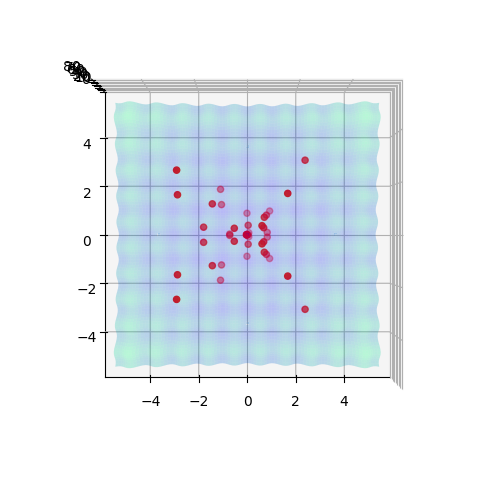

In [27]:
for iteration in range(10):
    # exec(op_to_exect)
    op.central_force_dynamic(pop, alpha=1.0)

    pop.evaluate_fitness(lambda x: fun.get_function_value(x))
    pop.update_positions(level='population', selector='all')
    pop.update_positions(level='global', selector='greedy')

    print(f"Iteration: {iteration + 1} ::", pop.get_state())
    show_positions()

## 4. Módulo de metaheurísticas

In [28]:
from customhys import metaheuristic as mh
fun = bf.Rastrigin(3)
prob = fun.get_formatted_problem()

prob

{'function': <function customhys.benchmark_func.BasicProblem.get_formatted_problem.<locals>.<lambda>(x)>,
 'boundaries': (array([-5.12, -5.12, -5.12]), array([5.12, 5.12, 5.12])),
 'is_constrained': True,
 'features': '110',
 'func_name': 'Rastrigin',
 'dimensions': 3}

In [29]:
heur = [( # Search operator 1
    'differential_mutation',  # Perturbator
    {  # Parameters
        'expression': 'current-to-best',
        'num_rands': 2,
        'factor': 1.0},
    'greedy'  # Selector
), (  # Search operator 2
    'differential_crossover',  # Perturbator
    {  # Parameters
        'crossover_rate': 0.2,
        'version': 'binomial'
    },
    'greedy'  # Selector
)]

met = mh.Metaheuristic(prob, heur, num_iterations=1000)
met.verbose = True
met.run()
print('x_best = {}, f_best = {}'.format(*met.get_solution()))


Search operators to employ:
differential_mutation(expression='current-to-best',num_rands=2,factor=1.0) with greedy
differential_crossover(crossover_rate=0.2,version='binomial') with greedy
--------------------------------------------------
1
pop. radius: 1.5897122381093023
x_best = [-0.99180719 -0.90941136 -3.09836894], f_best = 14.850461528858657
2
pop. radius: 1.5933096076433424
x_best = [-0.99180719 -0.90941136 -3.09836894], f_best = 14.850461528858657
3
pop. radius: 1.5877202485556905
x_best = [-0.99180719 -0.90941136 -3.09836894], f_best = 14.850461528858657
4
pop. radius: 1.3491797745099299
x_best = [-0.99180719 -0.90941136 -3.09836894], f_best = 14.850461528858657
5
pop. radius: 1.3423137506026903
x_best = [-0.99180719 -0.90941136 -3.09836894], f_best = 14.850461528858657
6
pop. radius: 1.335734782713351
x_best = [-0.99180719 -0.90941136 -3.09836894], f_best = 14.850461528858657
7
pop. radius: 1.238882941657756
x_best = [-0.99180719 -0.90941136 -3.09836894], f_best = 14.8504615

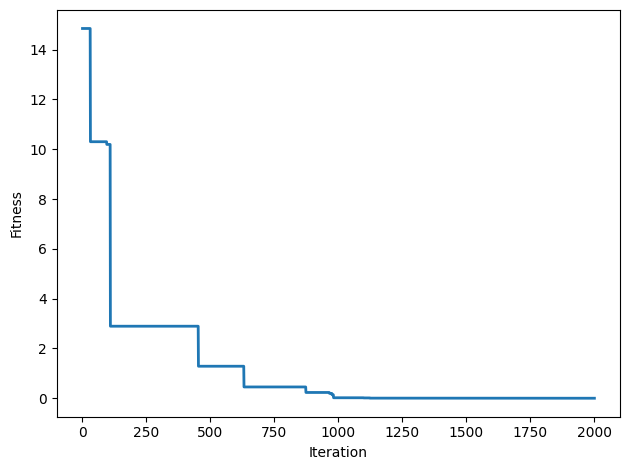

In [30]:
hist_values = met.historical

plt.figure()
plt.plot(hist_values['fitness'], lw=2)
plt.xlabel('Iteration'), plt.ylabel('Fitness')
plt.tight_layout()
plt.show()
# plt.savefig('ExFitness.svg')

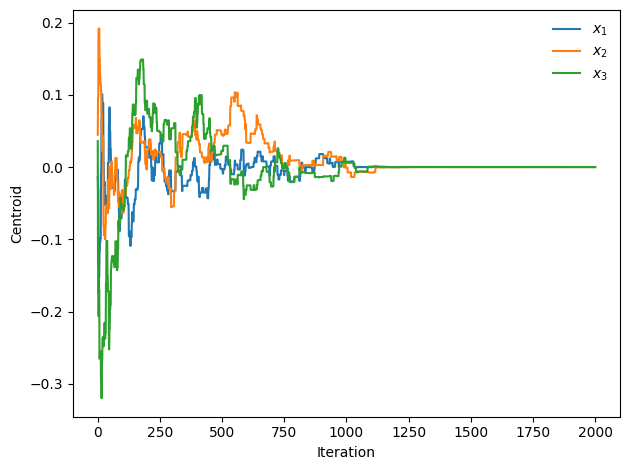

In [31]:
plt.figure()
plt.plot(hist_values['centroid'])
plt.xlabel(r'Iteration'), plt.ylabel(r'Centroid')
plt.legend([r'$x_1$', r'$x_2$', r'$x_3$'], frameon=False)
plt.tight_layout()
plt.show()
# plt.savefig('ExCentroid.svg')

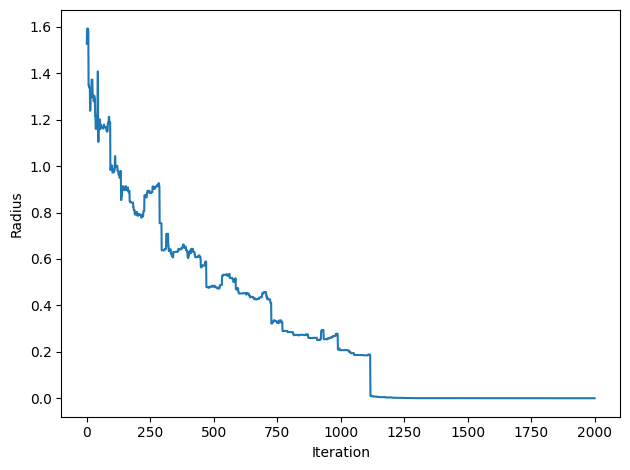

In [32]:
plt.figure()
plt.plot(hist_values['radius'])
plt.xlabel(r'Iteration'), plt.ylabel(r'Radius')
plt.tight_layout()
plt.show()
# plt.savefig('E|xRadius.svg')

Probemos ahora otra metaheurística

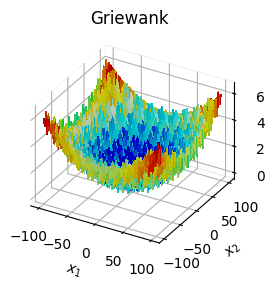

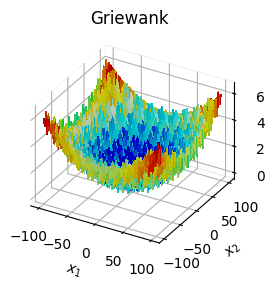

In [33]:
# El problema a optimizar
fun = bf.Griewank(6)
prob = fun.get_formatted_problem()
fun.plot()

In [34]:
# Esta será la metaheurística
heu_seq = [
    ('random_search', {'scale': 1.0, 'distribution': 'uniform'}, 'greedy'),
    ('spiral_dynamic', {'radius': 0.9, 'angle': 33.5, 'sigma': 0.1}, 'all'),
    ('gravitational_search', {'gravity': 0.5, 'alpha': 0.2}, 'metropolis')
    ]
met = mh.Metaheuristic(prob, heur, num_iterations=1000, num_agents=100)
met.verbose = False
met.run()
print('x_best = {}, f_best = {}'.format(*met.get_solution()))

x_best = [ 0.18317293  0.00585618  0.05044286 -0.07308803 -0.06798673  0.0679295 ], f_best = 0.5054932937508193


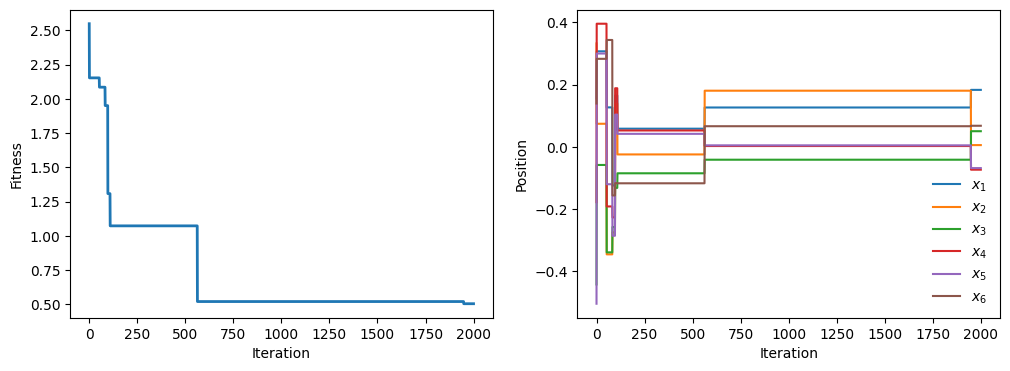

In [35]:
hist_values = met.historical

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(hist_values['fitness'], lw=2)
axs[0].set_xlabel('Iteration'), axs[0].set_ylabel('Fitness')

axs[1].plot(hist_values['position'])
axs[1].set_xlabel(r'Iteration'), axs[1].set_ylabel(r'Position')
axs[1].legend([f"$x_{ii+1}$" for ii in range(6)], frameon=False)

plt.show()

## 5. Módulo de híper-heurísticas

In [36]:
parameters = {
    'cardinality': 3, # Max. number of search operators
    'num_iterations': 100, # Max. number of iterations
    'num_agents': 30, # Number of agents (population size)
    'num_replicas': 30, # Number of replicas per metaheuristic
    'num_steps': 10, # Max. number of steps (hyper- heuristics)
    'stagnation_percentage': 0.3, # Allowed stagnation percentage
    'max_temperature': 200, # Initial temperature ( Simulated Annealing)
    'cooling_rate': 0.05 # Cooling rate (Simulated Annealing)
}

In [39]:
parameters = dict(
    cardinality=3,  # Max. numb. of SOs in MHs, lvl:1
    cardinality_min=1,  # Min. numb. of SOs in MHs, lvl:1
    num_iterations=100,  # Iterations a MH performs, lvl:1
    num_agents=30,  # Agents in population,     lvl:1
    as_mh=False,  # HH sequence as a MH?,     lvl:2
    num_replicas=50,  # Replicas per each MH,     lvl:2
    num_steps=50,  # Trials per HH step,       lvl:2
    stagnation_percentage=0.37,  # Stagnation percentage,    lvl:2
    max_temperature=1,  # Initial temperature (SA), lvl:2
    min_temperature=1e-6,  # Min temperature (SA),     lvl:2
    cooling_rate=1e-3,  # Cooling rate (SA),        lvl:2
    temperature_scheme='fast',  # Temperature updating (SA),lvl:2
    acceptance_scheme='exponential',  # Acceptance mode,          lvl:2
    allow_weight_matrix=True,  # Weight matrix,            lvl:2
    trial_overflow=False,  # Trial overflow policy,    lvl:2
    learnt_dataset=None,  # If it is a learnt dataset related with the heuristic space
    repeat_operators=True,  # Allow repeating SOs inSeq,lvl:2
    verbose=True,  # Verbose process,          lvl:2
    learning_portion=0.37,  # Percent of seqs to learn  lvl:2
    solver='static')  # Indicate which solver use lvl:1

In [40]:
from customhys import hyperheuristic as hh

dime = 5
fun = bf.Griewank(dime)

cate = fun.get_features()
prob = fun.get_formatted_problem()

# TODO: issue
hyp = hh.Hyperheuristic(heuristic_space="default.txt",
                        problem=prob, parameters=parameters, file_label='Griewank-5D-Exp1')

best_sol, best_perf, hist_curr, hist_best = hyp.solve()

Griewank-5D-Exp1 :: Step:    0, Action: None        , Temp: 1.00e+00, Card:  50, Perf: 4.34e-01 [Initial]
Griewank-5D-Exp1 :: Step:    1, Action: Shift       , Temp: 1.00e+00, Card:  50, candPerf: 5.99e-01, currPerf: 4.34e-01, bestPerf: 4.34e-01 , [Delta: 1.65e-01, ArgProb: -1.15e-01, Prob: 0.89] A
Griewank-5D-Exp1 :: Step:    2, Action: Restart     , Temp: 5.00e-01, Card:  50, candPerf: 7.87e-01, currPerf: 5.99e-01, bestPerf: 4.34e-01 , [Delta: 1.88e-01, ArgProb: -2.62e-01, Prob: 0.77] A
Griewank-5D-Exp1 :: Step:    3, Action: Mirror      , Temp: 3.33e-01, Card:  50, candPerf: 7.04e-01, currPerf: 7.87e-01, bestPerf: 4.34e-01 , [Delta: -8.31e-02, ArgProb: 1.74e-01, Prob: 1.00] A
Griewank-5D-Exp1 :: Step:    4, Action: RemoveMany  , Temp: 2.50e-01, Card:   4, candPerf: 2.47e+00, currPerf: 7.04e-01, bestPerf: 4.34e-01 , [Delta: 1.77e+00, ArgProb: -4.93e+00, Prob: 0.01] 
Griewank-5D-Exp1 :: Step:    5, Action: Add         , Temp: 2.00e-01, Card:  51, candPerf: 6.58e-01, currPerf: 7.04e-01

In [41]:
print("Performance: ", best_perf)
print(best_sol)

Performance:  0.43388471433569153
[142 143 121 135  97 139  33 137 106 109  34  68  28  74  88 193  65 187
 130 102 132  88 177  70 115  42 157 147 100  66  48  89 104  34  20 104
 142  16  82 163  78 202 156 127  91 161 123 148  57  68]


In [42]:
from customhys import tools as tl
full_data = tl.preprocess_files("./data_files/raw/", output_name='Exp1', only_laststep=False)
# full_data = tl.read_json("./Exp1.json")

Griewank 5D, last=-1:   0%|          | 0/1 [00:00<?, ?it/s]


KeyError: 'statistics'

In [ ]:
tl.printmsk(full_data)
data = full_data['results'][0]

In [ ]:
num_steps = len(data['hist_fitness'])

ax = plt.subplot()
violin_parts = plt.violinplot([[y[-1] for y in x] for x in data['hist_fitness']], range(num_steps),
                              showmeans=True, showmedians=True, showextrema=True,
                              )
perf_plot = plt.plot(data['performance'], 'o--', label='Performance')

for pc in violin_parts['bodies']:
    pc.set_facecolor('green')
    pc.set_edgecolor('black')

violin_parts['cmeans'].set_edgecolor('red')
violin_parts['cbars'].set_edgecolor('green')
violin_parts['cmedians'].set_edgecolor('blue')
violin_parts['cmins'].set_edgecolor('black')
violin_parts['cmaxes'].set_edgecolor('black')

plt.xticks(ticks=range(num_steps), labels=data['step'])
plt.xlabel(r'Step'), plt.ylabel(r'Fitness')

handles, labels = ax.get_legend_handles_labels()
plt.legend([pc, handles[0]], ['Raw Data', labels[0]], frameon=False)

plt.tight_layout()
plt.show()

In [ ]:
for ii in range(num_steps):
    fig = plt.figure()
    plt.plot(np.array(data['hist_fitness'][ii]).T, 'g', alpha=0.75)
    plt.ylabel(r'Fitness'), plt.xlabel(r'Iteration')
    plt.ylim(0, 4)
    plt.title(r'MH$^{' + '{}'.format(len(data['encoded_solution'][ii])) + '} = \\{' +
              '}, '.join(['h_{' + str(x) for x in data['encoded_solution'][ii]]) + '}\\}$', fontsize=18)
    plt.tight_layout()
    plt.show()
    # plt.savefig('hh_raw_fitness_s{}.eps'.format(data['step'][ii]))

In [ ]:
met = mh.Metaheuristic(prob, heur, num_iterations=1000)
met.verbose = True
met.run()
print('x_best = {}, f_best = {}'.format(*met.get_solution()))

In [ ]:
hist_values = met.historical

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(hist_values['fitness'], lw=2)
axs[0].set_xlabel('Iteration'), axs[0].set_ylabel('Fitness')

axs[1].plot(hist_values['position'])
axs[1].set_xlabel(r'Iteration'), axs[1].set_ylabel(r'Position')
axs[1].legend([f"$x_{ii+1}$" for ii in range(6)], frameon=False)

plt.show()